<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/iid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Identically and Independently Distributed Data**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

* In probability theory and statistics, a collection of random variables is independent and identically distributed if each random variable has the same probability distribution as the others and all are mutually independent. This property is usually abbreviated as i.i.d. or iid or IID. Herein, i.i.d. is used, because it is the most prevalent.

* In machine learning theory, i.i.d. assumption is often made for training datasets to imply that all samples stem from the same generative process and that the generative process is assumed to have no memory of past generated samples.

* The i.i.d. assumption is important in the classical form of the central limit theorem, which states that the probability distribution of the sum (or average) of i.i.d. variables with finite variance approaches a normal distribution.

* In statistics, it is **commonly assumed** that observations in a sample are effectively i.i.d.. The assumption (or requirement) that observations be i.i.d. tends to **simplify the underlying mathematics** of many statistical methods (see mathematical statistics and statistical theory). In practical applications of statistical modeling, however, the **assumption may or may not be realistic**.

* To partially test how realistic the assumption is on a given data set, the **correlation** can be computed, **lag plots** drawn or **turning point test** performed. The generalization of exchangeable random variables is often sufficient and more easily met.

https://en.m.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables

## **Independence**

* **Self-independence** of an event (Thus an event is independent of itself if and only if it almost surely occurs or its complement almost surely occurs; this fact is useful when proving [zero–one laws](https://en.m.wikipedia.org/wiki/Zero–one_law).)

* **Expectation** E [XY] = E[X][Y] and **covariance** is zero (The converse of these, i.e. the proposition that if two random variables have a covariance of 0 they must be independent, is not true.)

* Independence of the trials implies that the process is memoryless. Given that the probability p is known, past outcomes provide no information about future outcomes. (If p is unknown, however, the past informs about the future indirectly, through inferences about p.)

* Two events are independent, statistically independent, or stochastically independent if the occurrence of one does not affect the probability of occurrence of the other (equivalently, does not affect the odds). Similarly, two random variables are independent if the realization of one does not affect the probability distribution of the other.

* If the process is infinite, then from any point the future trials constitute a Bernoulli process identical to the whole process, the fresh-start property.

## **Identically Distributed**

* Two variables (X,Y) are identically distributed (ID) if they have the **same probability distribution**. 

* A sufficient condition for this is that **CDF(X)=CDF(Y)** where CDF stands for Cumulative Distribution Function. 

* A textbook way of describing this would be to write P(x ≤ X) = P(y ≤ Y). Even more formally and in the general case of k random variables (X1, X2... Xn) it can be said that they are Identically Distributed if their **marginal distributions have the same form**: fk(Xk;θk) ≡ fk(Xk;θ), for all k=1,2...,n.

* The necessity for variables to be identically distributed plays a significant role in a classical Null Hypothesis Statistical Test where the full definition of the null hypothesis states, among other things that the two variables are identically distributed.

* An immediate consequence of the requirement for identical distributions is that data analyzed under the assumption of ID should have **constant mean and variance**. If the data has a trend this assumptions is violated and a statistical model with the ID assumption in it becomes misspecified.

## **Examples**

**Examples of IID**

* i.i.d. variables are thought of as a discrete time Lévy process: each variable gives how much one changes from one time to another. For example, a sequence of Bernoulli trials is interpreted as the Bernoulli process. 

* One may generalize this to include continuous time Lévy processes, and many Lévy processes can be seen as limits of i.i.d. variables—for instance, the Wiener process is the limit of the Bernoulli process.

* **Bernoulli process** is a sequence of independent identically distributed Bernoulli trials. A Bernoulli process is a finite or infinite sequence of binary random variables, so it is a discrete-time stochastic process that takes only two values, canonically 0 and 1. The component Bernoulli variables Xi are identically distributed and independent. Prosaically, a Bernoulli process is a repeated coin flipping, possibly with an unfair coin (but with consistent unfairness).

* **White noise** is always an independent process but reverse may not be true. (First moment has to be zero and second moment has to be finite though)

* A sequence of outcomes of spins of a fair or unfair roulette wheel is i.i.d. One implication of this is that if the roulette ball lands on "red", for example, 20 times in a row, the next spin is no more or less likely to be "black" than on any other spin (see the [Gambler's fallacy](https://en.m.wikipedia.org/wiki/Gambler's_fallacy)).

* A sequence of fair or loaded dice rolls is i.i.d. A sequence of fair or unfair coin flips is i.i.d.

* In signal processing and image processing the notion of transformation to i.i.d. implies two specifications, the "i.d." (i.d. = identically distributed) part and the "i." (i. = independent) part: (i.d.) the signal level must be balanced on the time axis. (i.) the signal spectrum must be flattened, i.e. transformed by filtering (such as deconvolution) to a white noise signal (i.e. a signal where all frequencies are equally present).

* An i.i.d. sequence does not imply the probabilities for all elements of the sample space or event space must be the same. For example, repeated throws of loaded dice will produce a sequence that is i.i.d., despite the outcomes being biased.

**Data Samples that do not satisfy i.i.d. assumption**

* A medical dataset where multiple samples are taken from multiple patients, it is very likely that samples from same patients may be correlated.

* Samples drawn from time dependent processes, for example, year-wise census data.

* An i.i.d. sequence is different from a Markov sequence, where the probability distribution for the nth random variable is a function of the previous random variable in the sequence (for a first order Markov sequence).


## **Test for IID**

To partially test how realistic the assumption is on a given data set, the correlation can be computed, lag plots drawn or turning point test performed. The generalization of exchangeable random variables is often sufficient and more easily met.

**First Example: (Gaussian) White Noise** 

Hypothesis: Should be iid.

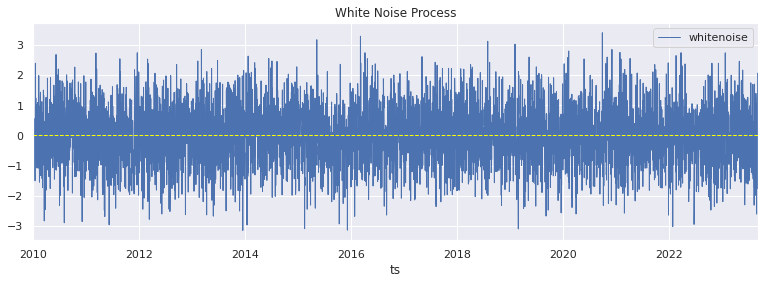

In [2]:
from random import gauss
from random import seed
from pandas import Series

# Set seed for reproducibility and hyperparameter
seed(1)
mean = 0.0
sigma = 1.0
periods = 5000

# Create White Noise
whitenoise = [gauss(mean, sigma) for i in range(periods)]
whitenoise = pd.DataFrame(data=Series(whitenoise), columns=['whitenoise'])

# Create Time Series
ts = pd.date_range('2010-01-01', periods=periods, freq='D')
ts = pd.DataFrame(data=ts, columns=['ts'])

# Merge and Set Index
series = pd.concat([ts, whitenoise], axis=1).set_index('ts')

# Visualize
sns.set(rc={'figure.figsize':(13, 4), "lines.linewidth": 1.0})
series.plot(title='White Noise Process')
plt.axhline(y=0, color='yellow', linestyle='--', linewidth=1.0)

**Second Example: Google Stock Prices** 

Hypothesis: Should NOT be iid.

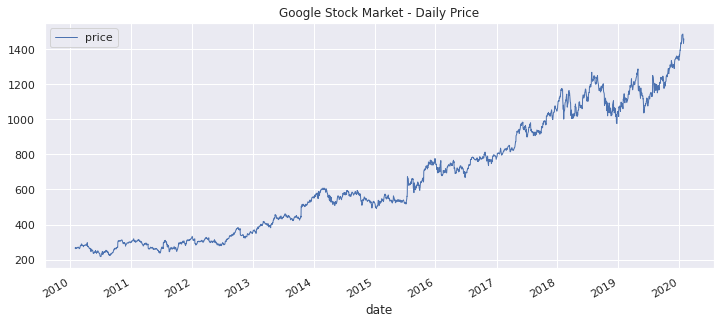

In [15]:
url = 'https://raw.githubusercontent.com/deltorobarba/machinelearning/master/google.csv'
data = pd.read_csv(url)
google = data[['Date', 'Close']].rename(columns={"Date": "date", "Close": "price"}).set_index('date')
google.index = pd.to_datetime(google.index, utc=False)
sns.set(rc={'figure.figsize':(12, 5), "lines.linewidth": 1.0})
google.plot(title='Google Stock Market - Daily Price')

**Autocorrelation Plots**

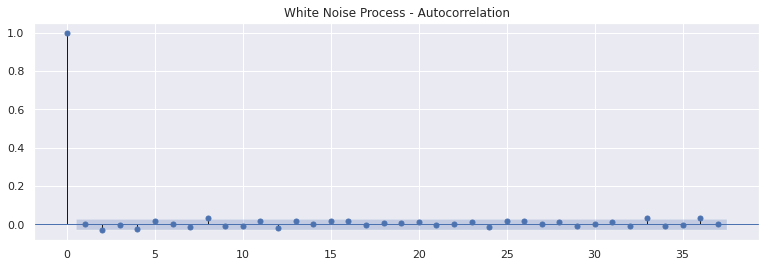

In [4]:
from statsmodels.graphics.tsaplots import plot_acf
# plot_acf(series.squeeze(), lags=15)
plot_acf(series)
plt.title('White Noise Process - Autocorrelation')
plt.show()

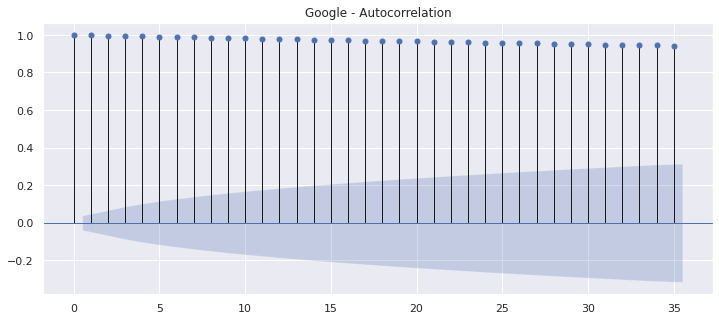

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
# plot_acf(series.squeeze(), lags=15)
plot_acf(google)
plt.title('Google - Autocorrelation')
plt.show()

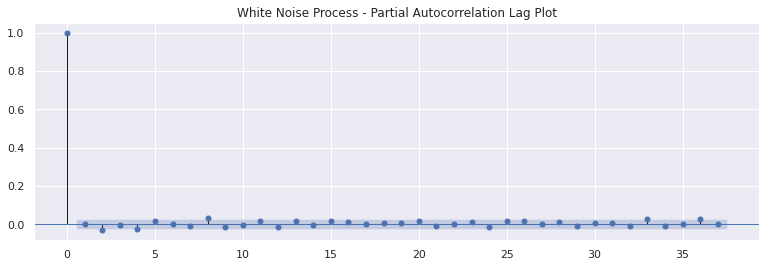

In [8]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series)
plt.title('White Noise Process - Partial Autocorrelation Lag Plot')
plt.show()

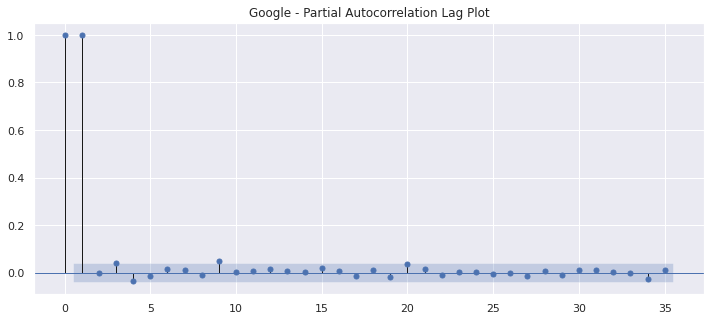

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(google)
plt.title('Google - Partial Autocorrelation Lag Plot')
plt.show()

**Lag Plot**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


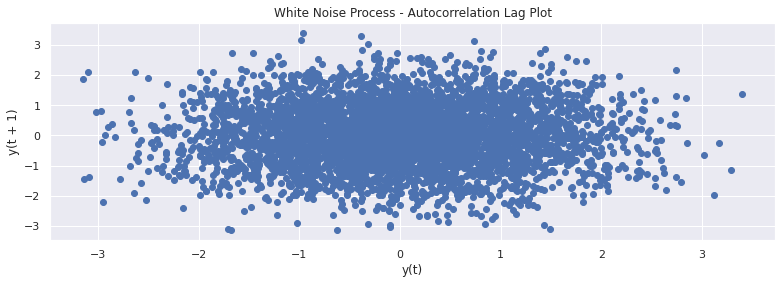

In [5]:
from pandas.plotting import lag_plot
lag_plot(series)
plt.title('White Noise Process - Autocorrelation Lag Plot')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


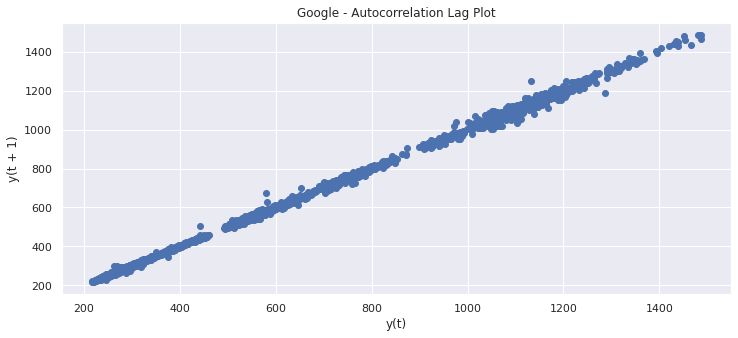

In [13]:
from pandas.plotting import lag_plot
lag_plot(google)
plt.title('Google - Autocorrelation Lag Plot')
plt.show()

**Durban-Watson Statistic**

* Is a test for autocorrelation in the residuals from a statistical regression analysis.
* The null hypothesis of the test is that there is no serial correlation
* This statistic will always be between 0 and 4. Closer to 0: evidence for positive serial correlation, closer to 4: negative serial correlation. 2 means no autocorrelation.

In [6]:
# Durban-Watson Statistic. Value 2: no serial correlation. 0: positive correlation. 4: negative correlation
import statsmodels.api as sm
import statsmodels.tsa.stattools
statsmodels.stats.stattools.durbin_watson(series, axis=0)

array([1.99873153])

Test statistic is close to 2. There is no autocorrelation present.

In [14]:
# Durban-Watson Statistic. Value 2: no serial correlation. 0: positive correlation. 4: negative correlation
import statsmodels.api as sm
import statsmodels.tsa.stattools
statsmodels.stats.stattools.durbin_watson(google, axis=0)

array([0.0002163])

Test statistic is close to 0. There is autocorrelation present.

**Ljung-Box Q Statistic**

In [7]:
# Ljung-Box test of autocorrelation in residuals. H0: independence in a given time series
import statsmodels.api as sm
sm.stats.acorr_ljungbox(series.whitenoise, lags=[(np.int_((periods/2)-2))])

(array([2360.64190127]), array([0.97561779]))

P-value > zero. Do not reject H0. Series is independent.

In [16]:
# Ljung-Box test of autocorrelation in residuals. H0: independence in a given time series
import statsmodels.api as sm
sm.stats.acorr_ljungbox(google.price, lags=[(np.int_((periods/2)-2))])

(array([2100276.01821409]), array([0.]))

P-value = zero. Reject H0. Series is not independent.

**BDS Independence Test**

* Brock, W. Dechert and J. Scheinkman
* BDS test statistic for independence of a time series
* Time Series is IID (= Null Hypothesis)
* The BDS test is free of nuisance parameters, but it suffers from some problems. For instance, the power of the BDS test depends on the choice of value of the dimensional distance parameter. Another problem is that the BDS test, though asymptotically normal under the null, has high rates of Type I error, especially for non Gaussian data

In [3]:
# BDS Independence Test. H0: Time Series is IID
import statsmodels.api as sm
sm.tsa.stattools.bds(series.whitenoise, max_dim=6, epsilon=None, distance=1.5)

(array([2.20528503, 1.79865181, 1.73497756, 1.50245135, 1.06946712]),
 array([0.0274341 , 0.07207378, 0.08274478, 0.13298058, 0.28485924]))

P-value is > 0.05. Series is IID.

In [17]:
# BDS Independence Test. H0: Time Series is IID
import statsmodels.api as sm
sm.tsa.stattools.bds(google.price, max_dim=6, epsilon=None, distance=1.5)

(array([205.70258454, 225.00196538, 249.17950684, 283.32870842,
        329.89981469]), array([0., 0., 0., 0., 0.]))

P-value is = 0. Series is not IID.

https://www.gakhov.com/articles/find-turning-points-for-a-trajectory-in-python.html